In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv('Bank1.csv')

In [5]:
dataset.head()

,Age,Sex,Region,Married,Car,Savingaccount,Mortageg,PEP
0,48,2,3,2,1,2,2,1
1,40,1,1,1,1,1,1,2
2,51,2,3,1,2,1,2,2
3,23,2,1,1,1,2,2,2
4,57,2,2,1,2,2,2,2


In [7]:
X = dataset.iloc[:,0:8].values

In [9]:
X

array([[48,  2,  3, ...,  2,  2,  1],
       [40,  1,  1, ...,  1,  1,  2],
       [51,  2,  3, ...,  1,  2,  2],
       ...,
       [64,  1,  3, ...,  2,  2,  1],
       [51,  2,  1, ...,  2,  1,  2],
       [46,  2,  1, ...,  1,  2,  1]], dtype=int64)

In [15]:
#Creating the elbow chart

from sklearn.cluster import KMeans
wcss=[]
for i in range(1,10):
    kmeans = KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [17]:
wcss

[61182.400000000016,
 17127.619554046214,
 7507.004561807746,
 4324.490525836416,
 3131.888316298553,
 2423.4537163113937,
 2381.723812440624,
 1493.1443586485311,
 1386.8850219778624]

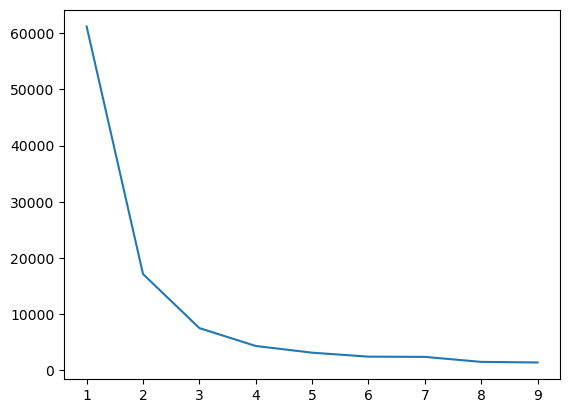

In [21]:
plt.plot(range(1,10),wcss)

In [43]:
#Define the clusters for each record

kmeans1= KMeans(n_clusters=3,init='k-means++')
y_kmeans = kmeans1.fit_predict(X)

In [45]:
y_kmeans

array([2, 2, 2, 1, 0, 0, 1, 0, 2, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 1, 0, 2,
       0, 1, 1, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 1, 1, 2, 2, 0, 0, 2, 0, 1,
       1, 0, 2, 1, 0, 2, 1, 2, 2, 2, 0, 0, 0, 1, 1, 1, 2, 0, 2, 1, 1, 2,
       1, 2, 1, 1, 1, 1, 2, 0, 0, 0, 2, 0, 1, 0, 2, 1, 1, 2, 0, 2, 1, 0,
       1, 0, 2, 1, 0, 0, 0, 1, 1, 1, 2, 1, 0, 1, 2, 2, 0, 2, 2, 1, 1, 1,
       2, 1, 2, 2, 0, 0, 0, 1, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 1, 0, 1, 0, 1, 1, 0, 1, 0, 2, 0, 1,
       2, 1, 2, 1, 0, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 0, 0, 1, 2, 1, 0, 0,
       2, 2, 2, 0, 1, 0, 0, 2, 2, 2, 1, 2, 2, 2, 0, 2, 0, 2, 0, 0, 1, 0,
       1, 1, 1, 1, 2, 2, 1, 2, 0, 1, 2, 1, 1, 1, 0, 1, 0, 1, 2, 1, 1, 0,
       0, 2, 1, 0, 1, 2, 0, 0, 1, 2, 2, 0, 2, 2, 2, 1, 2, 0, 1, 1, 2, 2,
       2, 2, 1, 2, 0, 2, 0, 2, 2, 2, 0, 0, 1, 1, 1, 0, 1, 0, 2, 0, 1, 1,
       1, 0, 2, 1, 2, 0, 0, 2, 0, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 0,
       2, 1, 1, 1, 0, 2, 0, 0, 2, 2, 2, 0, 2, 2])

In [47]:
#Concatenate the dataset and the cluster index
pd.concat([dataset,pd.DataFrame(Y_kmeans)],axis=1)

,Age,Sex,Region,Married,Car,Savingaccount,Mortageg,PEP,0
0,48,2,3,2,1,2,2,1,2
1,40,1,1,1,1,1,1,2,2
2,51,2,3,1,2,1,2,2,1
3,23,2,1,1,1,2,2,2,0
4,57,2,2,1,2,2,2,2,1
...,...,...,...,...,...,...,...,...,...
295,44,1,3,1,2,2,1,1,2
296,50,1,1,2,1,1,1,1,2
297,64,1,3,2,2,2,2,1,1
298,51,2,1,2,2,2,1,2,1


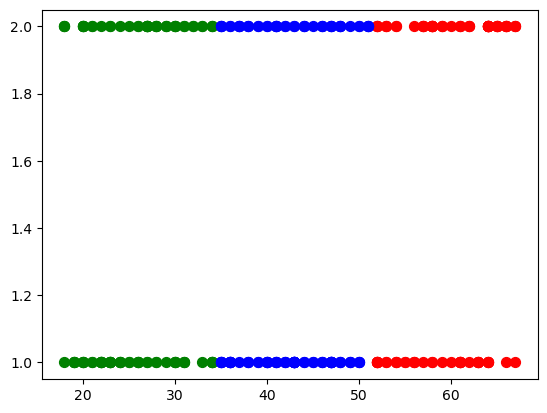

In [59]:
#visualize the clsuters

plt.scatter(X[y_kmeans==0,0], y=X[y_kmeans==0,1],s=50,c='red')
plt.scatter(X[y_kmeans==1,0], y=X[y_kmeans==1,1],s=50,c='green')

plt.scatter(X[y_kmeans==2,0], y=X[y_kmeans==2,1],s=50,c='blue')

In [61]:
#Find the cluster centroid for each cluster
cluster_centroids  = kmeans1.cluster_centers_

In [63]:
cluster_centroids

array([[59.66666667,  1.58064516,  2.38709677,  1.2688172 ,  1.44086022,
         1.51612903,  1.69892473,  1.43010753],
       [25.87368421,  1.46315789,  2.44210526,  1.35789474,  1.33684211,
         1.51578947,  1.62105263,  1.63157895],
       [42.53571429,  1.42857143,  2.19642857,  1.34821429,  1.5       ,
         1.5       ,  1.63392857,  1.55357143]])

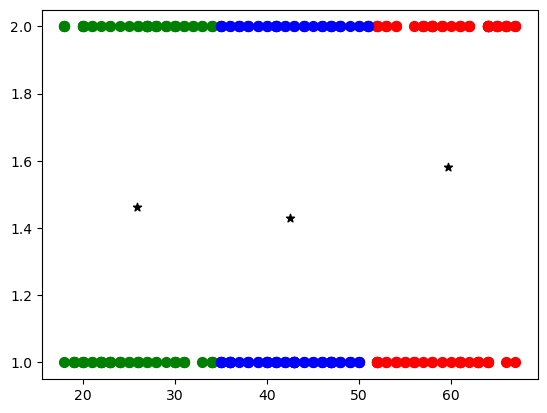

In [93]:
#Visualize the cluster centroids in the scatter plot

plt.scatter(X[y_kmeans==0,0],y=X[y_kmeans==0,1],s=50,c='red')
plt.scatter(X[y_kmeans==1,0],y=X[y_kmeans==1,1],s=50,c='green')
plt.scatter(X[y_kmeans==2,0],y=X[y_kmeans==2,1],s=50,c='blue')

plt.scatter(cluster_centroids[0][0],cluster_centroids[0][1],marker='*',c='black')
plt.scatter(cluster_centroids[1][0],cluster_centroids[1][1],marker='*',c='black')
plt.scatter(cluster_centroids[2][0],cluster_centroids[2][1],marker='*',c='black')

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [97]:
df = pd.read_csv('Bank1.csv')

In [101]:
df.head()

,Age,Sex,Region,Married,Car,Savingaccount,Mortageg,PEP
0,48,2,3,2,1,2,2,1
1,40,1,1,1,1,1,1,2
2,51,2,3,1,2,1,2,2
3,23,2,1,1,1,2,2,2
4,57,2,2,1,2,2,2,2


In [99]:
#Separate the data frame into two parts 

X = df.values
Y=df['PEP']


In [103]:
#Delete the class variable in independent dataset
X = np.delete(X,7,axis=1)

In [107]:
print(X[:5])

[[48  2  3  2  1  2  2]
 [40  1  1  1  1  1  1]
 [51  2  3  1  2  1  2]
 [23  2  1  1  1  2  2]
 [57  2  2  1  2  2  2]]


In [111]:
#Split the dataset into test and training se

from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

In [113]:
#Find the prediction of the Using Decision tree

from sklearn import tree

df_clf = tree.DecisionTreeClassifier(max_depth=5)

df_clf.fit(X_train,Y_train)
df_clf.score(X_test,Y_test)

y_pred = df_clf.predict(X_test)

df_clf.score(X_test,Y_test)

0.7111111111111111

In [117]:
y_pred

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2,
       1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1,
       1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2,
       1, 1], dtype=int64)

In [119]:
from sklearn.metrics import confusion_matrix

confusion_matrix(Y_test,y_pred)

array([[41,  9],
       [17, 23]], dtype=int64)